# Cluster the data and visualize
Following [this guide](https://www.askpython.com/python/examples/plot-k-means-clusters-python)

In [21]:
!pip install scikit-learn matplotlib mplcursors ipympl python-dotenv openai langchain
!pip install ipywidgets --upgrade

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [22]:
#Importing required modules
from typing import List, Tuple
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import json
import cluster

file_path = f"data_store/embeddings_seed_69420_size_10000.json"
embeddings: List[Tuple[str, List[float]]] = json.load(open(file_path, "r"))

N_EMBED_DIMS = len(embeddings[0][1])
N_CLUSTERS = 16
N_DIMS = N_EMBED_DIMS
SEED = 69420
df, label, u_labels = cluster.cluster(embeddings, n_clusters=N_CLUSTERS, dimensions=N_DIMS)

/home/lev/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
np.random.seed(SEED)
choices = np.random.choice(np.arange(len(df)), size=800)
colors = np.random.rand(N_CLUSTERS, 3)

In [24]:
%matplotlib ipympl
import textwrap
from mplcursors import cursor
import mplcursors
from matplotlib.text import Annotation

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)
c = np.random.randint(1,5,size=len(choices))

def plot_axis(dim : int):
    dim_1 = dim
    fig, ax = plt.subplots(figsize=(18,10))
    curr_ax = ax
    sc = curr_ax.scatter(df[choices, dim_1], np.zeros(len(choices)), color=colors[label[choices]])
    curr_ax.set_title(f"KMeans on Dimension {dim_1 + 1}")


    annot = curr_ax.annotate("", xy=(-0,0), xytext=(-80, 15), textcoords="offset points",
                    bbox=dict(boxstyle="round,pad=0.3", fc="w"),
                    arrowprops=dict(arrowstyle="->")
                    )
    annot.set_wrap(True)
    annot.set_visible(False)

    def update_annot(ind):

        pos = sc.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        text = "{}".format(" ".join([embeddings[n][0] for n in ind["ind"]]))
        wrapped_text = textwrap.fill(text, width=60)

        annot.set_text(wrapped_text)
        # annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
        annot.get_bbox_patch().set_alpha(1)


    def hover(event):
        # print("AAAA", event)
        vis = annot.get_visible()
        if event.inaxes is not None and event.inaxes == ax:
            # print("BBBB", event)
            # print(scs[0])
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()
    fig.canvas.mpl_connect("motion_notify_event", hover)

In [25]:
# print("\n".join(get_theorems_in_group(0)[:20]))
# print("\n\n")

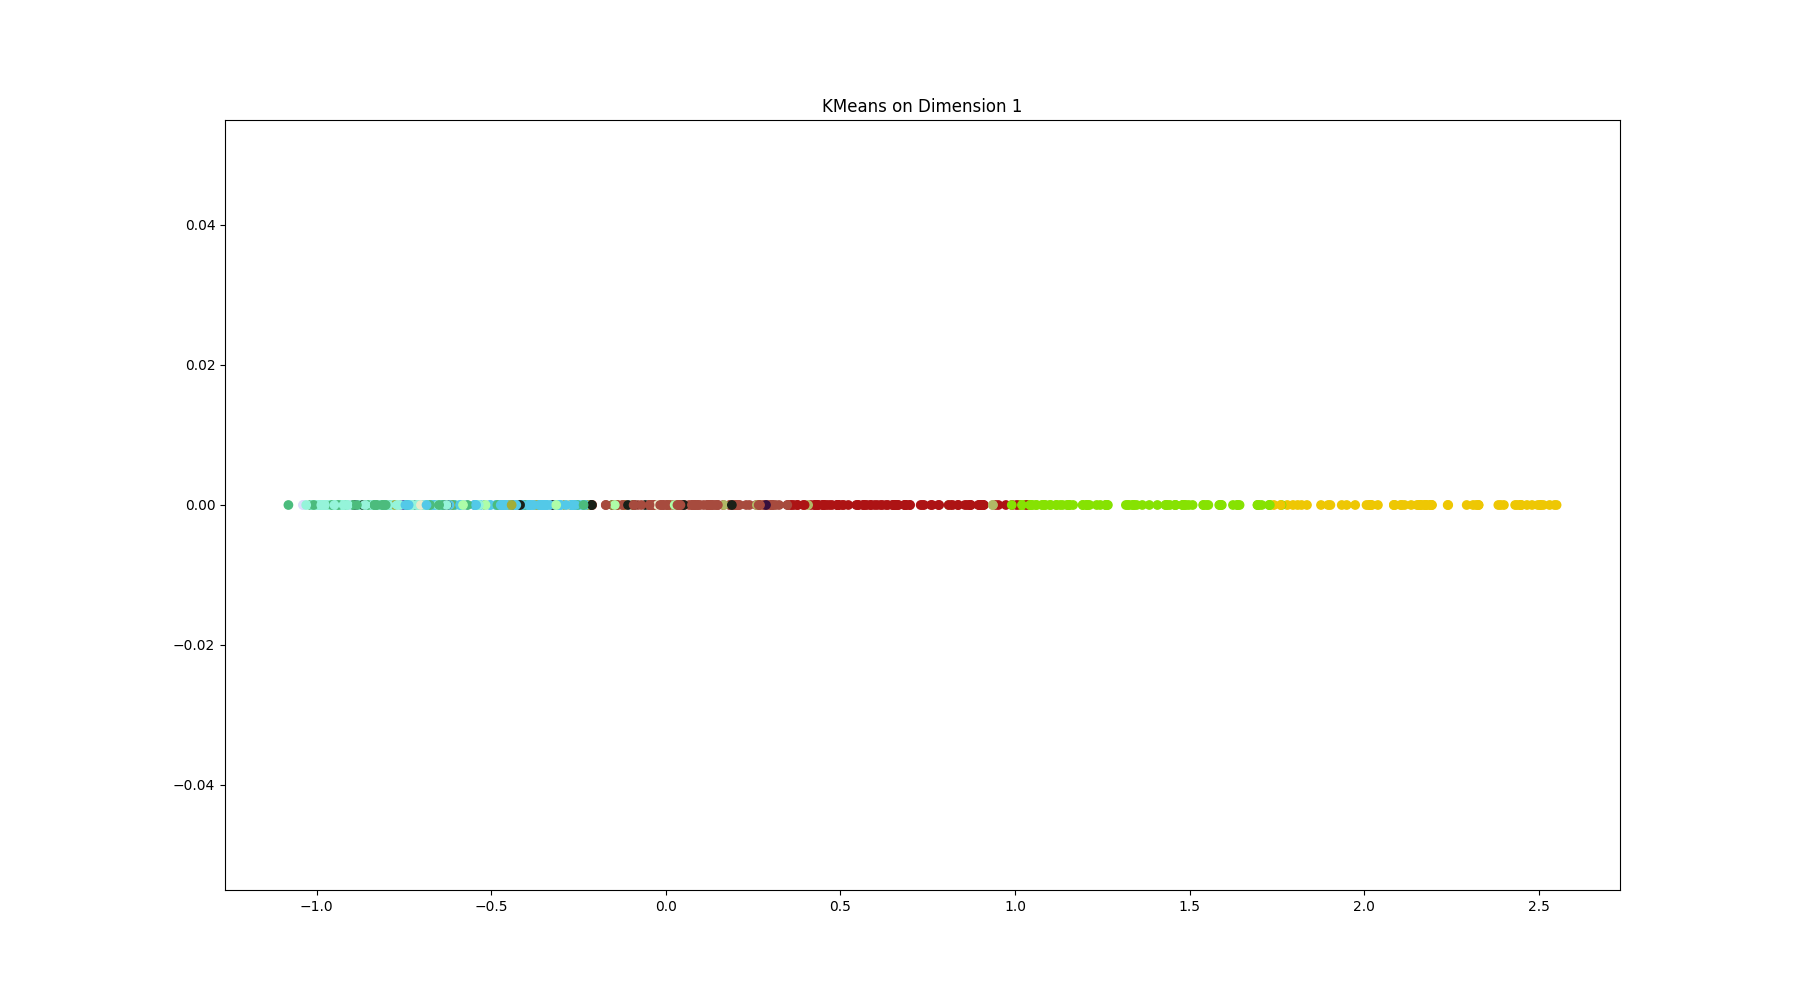

In [26]:
plot_axis(0)

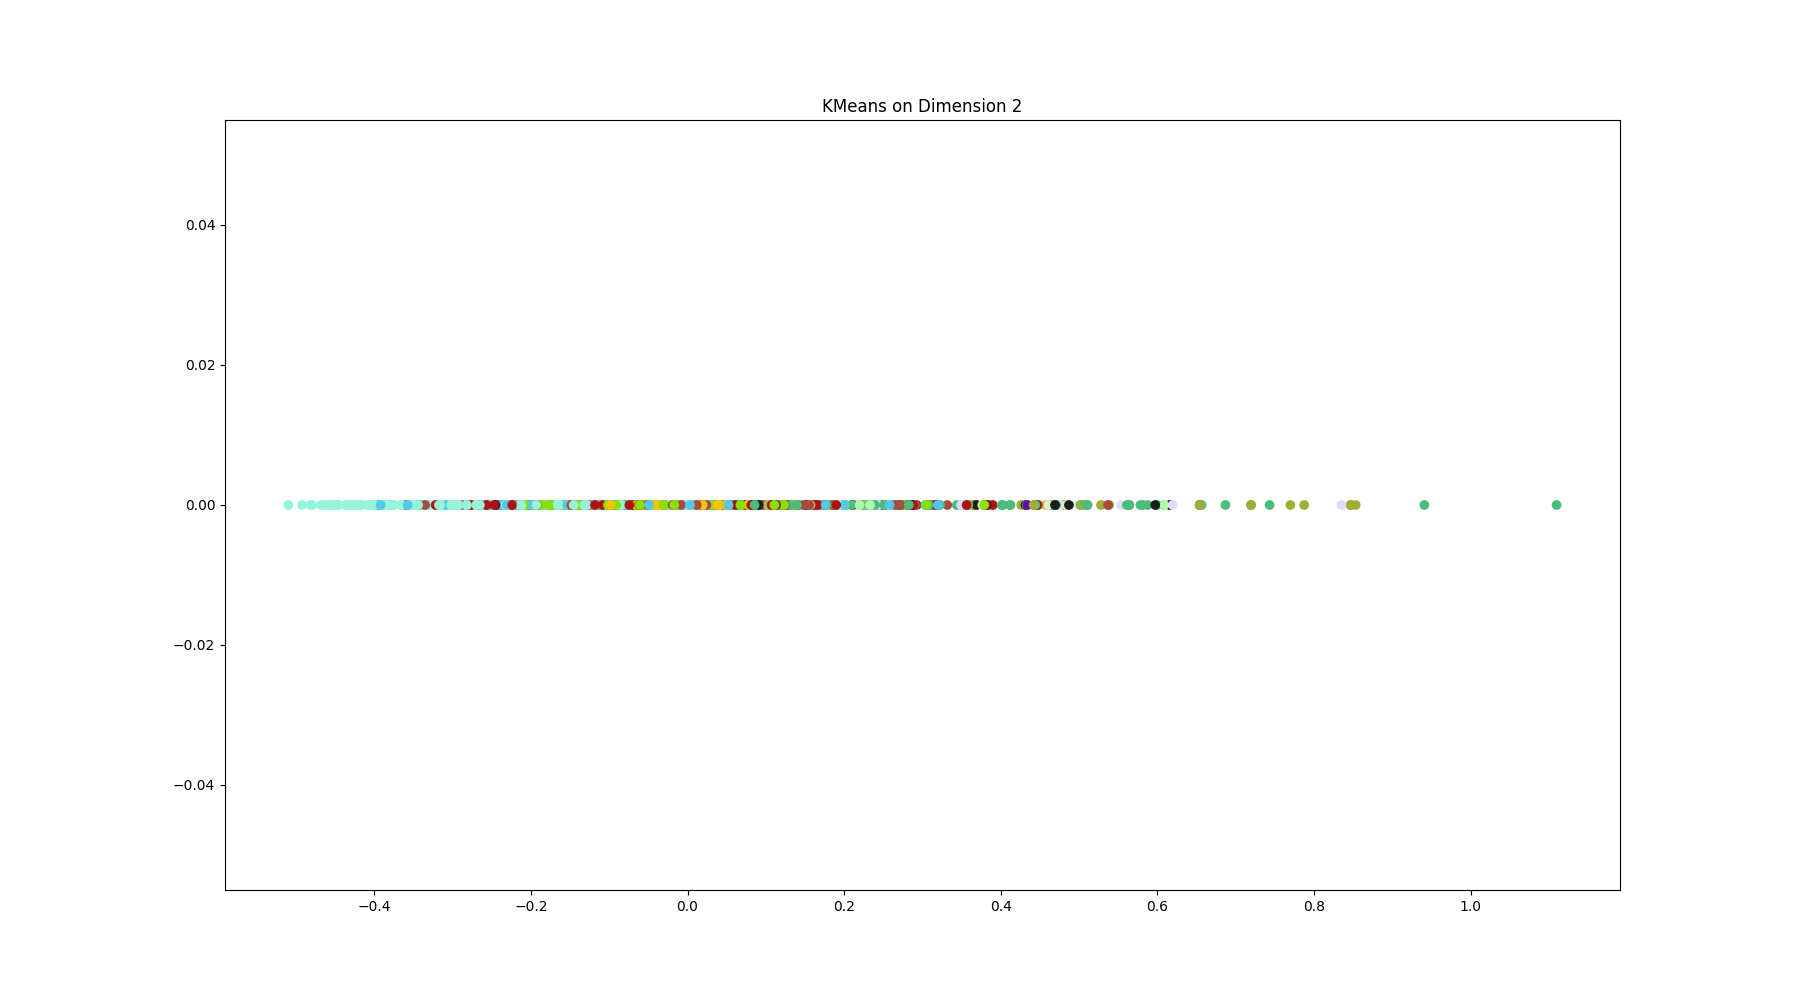

In [27]:
plot_axis(1)

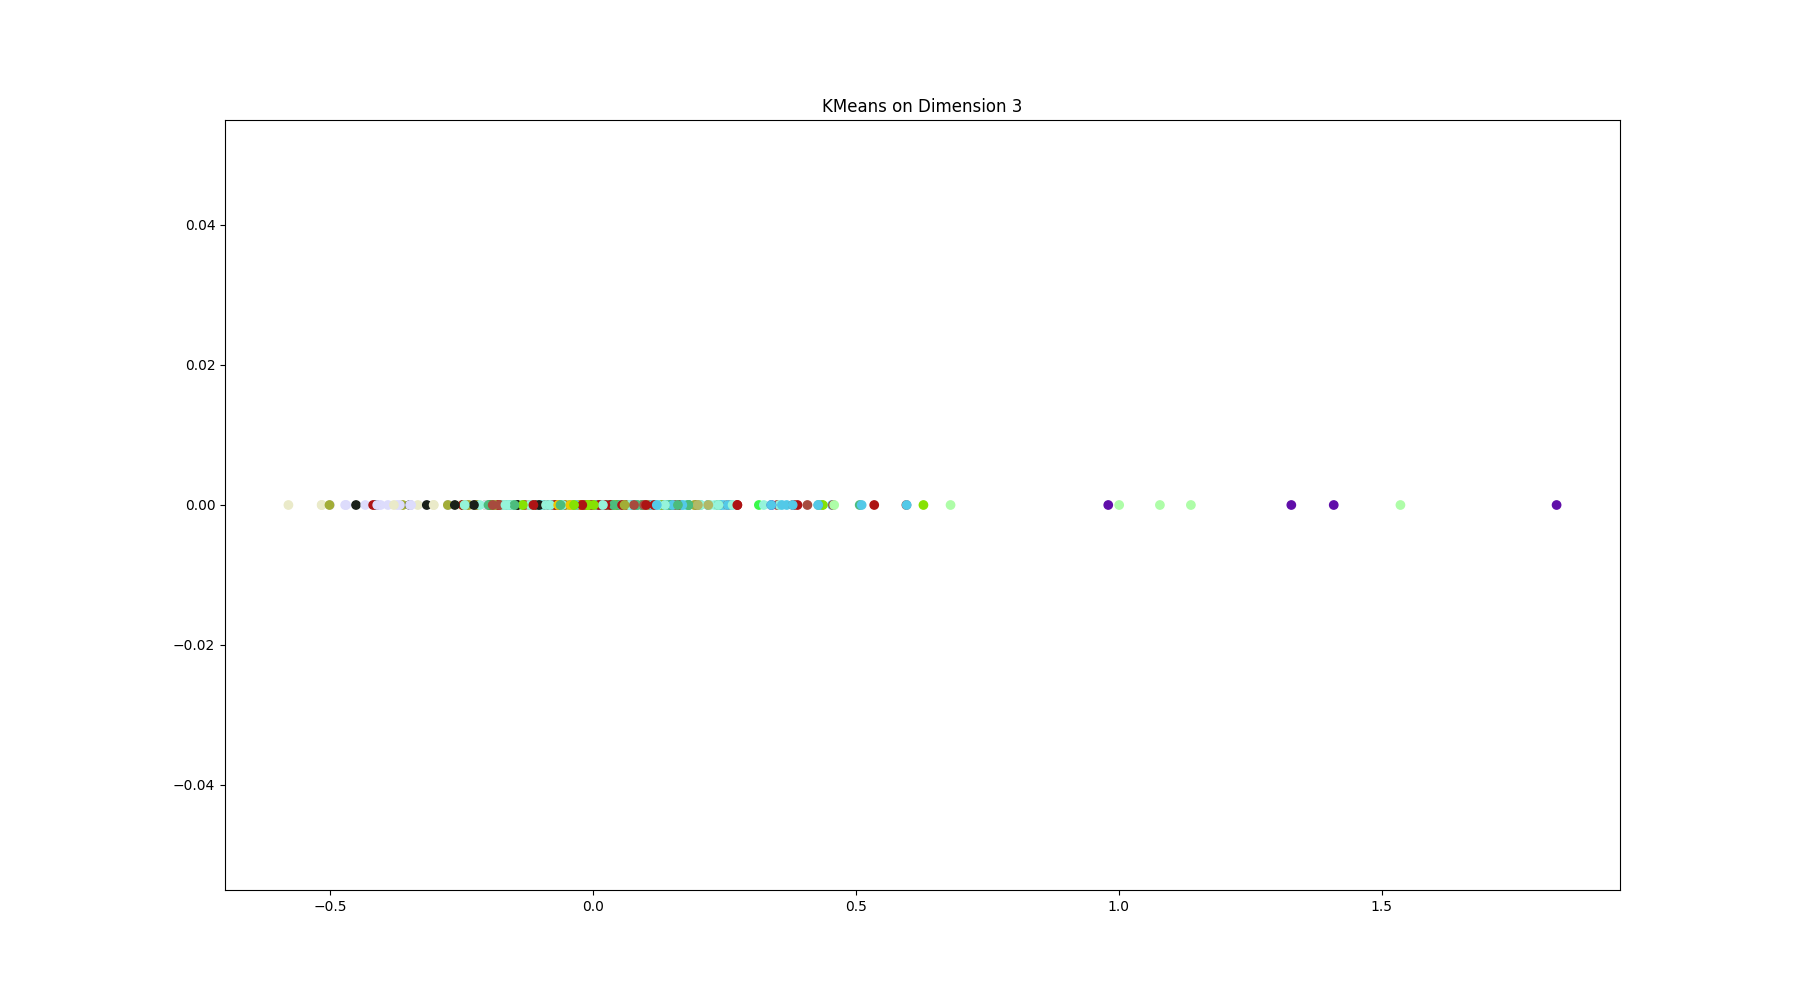

In [28]:
plot_axis(2)

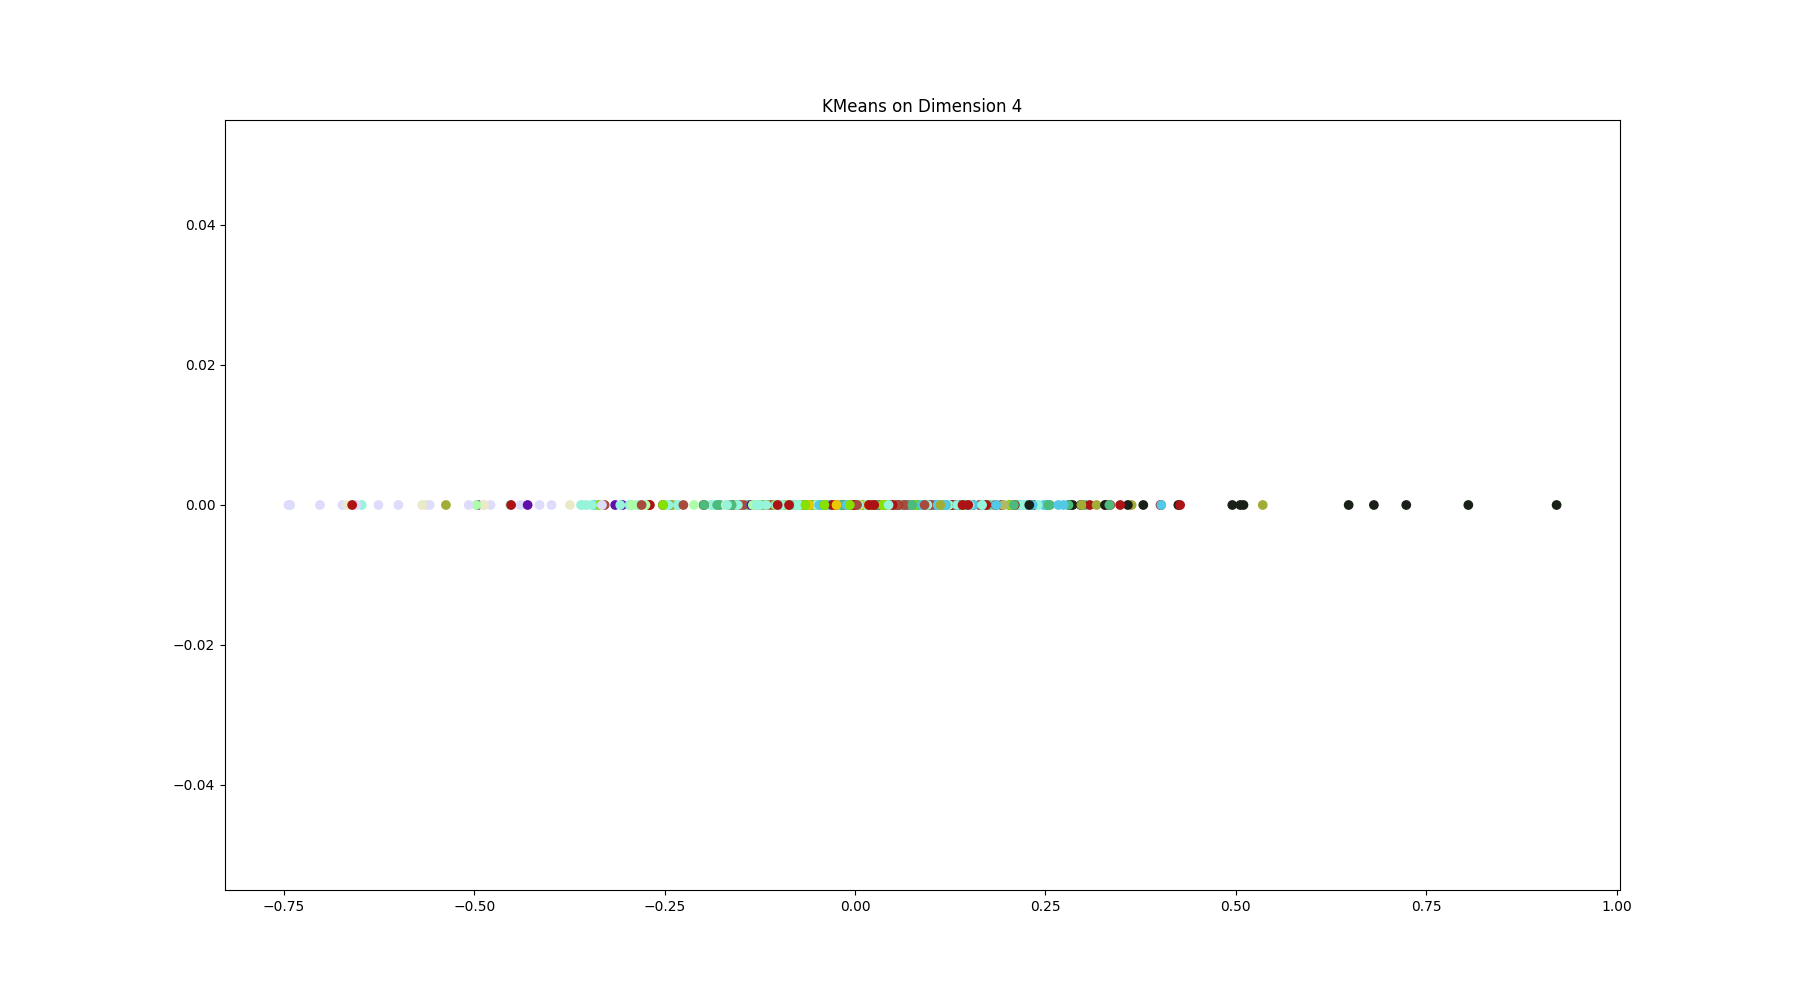

In [29]:
plot_axis(3)

In [30]:
import os
from dotenv import load_dotenv

load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

In [31]:
import cluster

def get_theorems_in_group(group_idx: int, max_size=None, random=True):
	s = [embeddings[i][0] for i in np.where(label == group_idx)[0]]
	if max_size is None or len(s) <= max_size: 
		return s
	if not random:
		return s[:max_size]
	c = np.random.choice(np.arange(len(s)), size=max_size, replace=False)
	return [s[i] for i in c]

MAX_SIZE=30
get_theorems_in_group(6, max_size=MAX_SIZE)#, get_theorems_in_group(6, max_size=MAX_SIZE), i, j, api_key=OPENAI_API_KEY
# rel_0_1  = cluster.relative_labels(get_theorems_in_group(0, max_size=MAX_SIZE), get_theorems_in_group(1, max_size=MAX_SIZE), api_key=OPENAI_API_KEY)

['lemma min_le_iff [linear_order α] {a b c : α} :\n   min (a : with_zero α) b ≤ c ↔ min a b ≤ c',
 'lemma one_le_inv_iff : 1 ≤ a⁻¹ ↔ 0 < a ∧ a ≤ 1',
 'lemma Ici_le_Ioi (a : α) : Ici a ≤ Ioi a',
 'lemma min_eq_iff : min a b = c ↔ a = c ∧ a ≤ b ∨ b = c ∧ b ≤ a',
 'lemma mul_eq {α} [ordered_semiring α] {a b : α} (ha : a = 0) (hb : 0 < b) : b * a = 0',
 'lemma le_mul_iff_one_le_right\n  [pos_mul_mono α] [pos_mul_mono_rev α]\n  (a0 : 0 < a) :\n  a ≤ a * b ↔ 1 ≤ b',
 'lemma min_le_iff : min a b ≤ c ↔ a ≤ c ∨ b ≤ c',
 'theorem abs_le_abs (h₀ : a ≤ b) (h₁ : -a ≤ b) : |a| ≤ |b|',
 'lemma fold_min_le : s.fold min b f ≤ c ↔ (b ≤ c ∨ ∃ x∈s, f x ≤ c)',
 'lemma neg_le_one_iff {a : α} : a⁻ ≤ 1 ↔ a⁻¹ ≤ 1',
 'lemma lt_of_mul_self_lt_mul_self (hb : 0 ≤ b) : a * a < b * b → a < b',
 'lemma div_le_div (hc : 0 ≤ c) (hac : a ≤ c) (hd : 0 < d) (hbd : d ≤ b) : a / b ≤ c / d',
 "lemma lt_div_iff_mul_lt' : b < c / a ↔ a * b < c",
 'lemma mem_Iic_iff : b ∈ Iic a ↔ b ≤ a',
 'lemma mem_mk {s : set M} {x : M} (h_mu

In [32]:
def get_all_differences():
	differences = []
	for i in range(N_CLUSTERS):
		for j in range(i):
			print(i, j)
			diffs = cluster.relative_labels(get_theorems_in_group(i, max_size=MAX_SIZE), get_theorems_in_group(j, max_size=MAX_SIZE), i, j, api_key=OPENAI_API_KEY)
			print(diffs)
			differences.append((i, j, diffs))
	return differences
j = {}
# j['differences'] = get_all_differences()
# j['differences'] = differences

In [33]:
# TODO: change to ture?
if False:
	j['theorems'] = [[
					[lab, embeddings[idx][0]] for idx in np.where(label == lab)[0].tolist()
			  ] for lab in range(N_CLUSTERS)]
	# get_all_differences()
	json.dump(j, open(f"data_store/differences_clustersize_{N_CLUSTERS}_seed_{SEED}.json", "w"))

## Assign a final label based off of differences

In [34]:
from langchain import OpenAI

def get_label(centroid_idx: int, differences: List[Tuple[int, int, str]]):
	related_diffs = []
	for i, j, diffs in differences:
		if i == centroid_idx or j == centroid_idx:
			related_diffs.append(diffs)
	label = "Set Cluster " + str(centroid_idx)
	prompt = "Given the following differences between different sets of two cluster, what is the primary focus of " + label + """ in one sentence?

""" + "\n".join(related_diffs) + """

PRIMARY FOCUS:"""
	llm = OpenAI(model_name="gpt-4", openai_api_key=OPENAI_API_KEY)
	ret = llm(prompt)
	return ret


In [35]:
def get_and_save_all_labels():
	llm_labels = []
	for i in range(N_CLUSTERS):
		llm_labels.append(get_label(i, j['differences']))
	j["llm_labels"] = llm_labels
	json.dump(j, open(f"data_store/differences_clustersize_{N_CLUSTERS}_seed_{SEED}.json", "w"))
# get_and_save_all_labels()

## Now lets try a "BP" based approach

In [36]:
import numbers

# From https://github.com/hichamjanati/pyldpc, but modified to make a square matrix
def check_random_state(seed):
    """Turn seed into a np.random.RandomState instance
    Parameters
    ----------
    seed : None | int | instance of RandomState
        If seed is None, return the RandomState singleton used by np.random.
        If seed is an int, return a new RandomState instance seeded with seed.
        If seed is already a RandomState instance, return it.
        Otherwise raise ValueError.
    """
    if seed is None or seed is np.random:
        return np.random.mtrand._rand
    if isinstance(seed, numbers.Integral):
        return np.random.RandomState(seed)
    if isinstance(seed, np.random.RandomState):
        return seed
    raise ValueError('%r cannot be used to seed a numpy.random.RandomState'
                     ' instance' % seed)

def parity_check_matrix(n_code, d_v, d_c, seed=None):
    """
    Build a regular Parity-Check Matrix H following Callager's algorithm.

    Parameters
    ----------
    n_code: int, Length of the codewords.
    d_v: int, Number of parity-check equations including a certain bit.
        Must be greater or equal to 2.
    d_c: int, Number of bits in the same parity-check equation. d_c Must be
        greater or equal to d_v and must divide n.
    seed: int, seed of the random generator.

    Returns
    -------
    H: array (n_equations, n_code). LDPC regular matrix H.
        Where n_equations = d_v * n / d_c, the total number of parity-check
        equations.

    """
    rng = check_random_state(seed)

    if d_v <= 1:
        raise ValueError("""d_v must be at least 2.""")

    # if d_c <= d_v:
    #     raise ValueError("""d_c must be greater than d_v.""")

    if n_code % d_c:
        raise ValueError("""d_c must divide n for a regular LDPC matrix H.""")

    n_equations = (n_code * d_v) // d_c

    block = np.zeros((n_equations // d_v, n_code), dtype=int)
    H = np.empty((n_equations, n_code))
    block_size = n_equations // d_v

    # Filling the first block with consecutive ones in each row of the block

    for i in range(block_size):
        for j in range(i * d_c, (i+1) * d_c):
            block[i, j] = 1
    H[:block_size] = block

    # reate remaining blocks by permutations of the first block's columns:
    for i in range(1, d_v):
        H[i * block_size: (i + 1) * block_size] = rng.permutation(block.T).T
    H = H.astype(int)
    return H

parity_check_matrix(10, 2, 2)

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [37]:
import numpy as np

cluster_cluster_deg = 4
# Half of the clusters are "parity checks" and the rest are "bits"
H= parity_check_matrix(int(N_CLUSTERS / 2), cluster_cluster_deg, cluster_cluster_deg, seed=SEED)
H

array([[1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1]])

In [38]:
# Get the bit indices and the parity check indices
parity_check_inds = np.random.choice(np.arange(N_CLUSTERS), size=int(N_CLUSTERS / 2), replace=False)
bit_inds = np.array(list(filter(lambda x: x not in parity_check_inds, np.arange(N_CLUSTERS))))
np.random.shuffle(bit_inds)
bit_inds, parity_check_inds

(array([ 1,  9, 10, 14,  4, 13,  5,  2]),
 array([ 0,  3, 11, 12,  8,  7, 15,  6]))

In [39]:
import cluster
import copy
import numpy.typing as npt
from typing import List
# Jank BP-esque LLM message passing algorithm
MODEL_NAME = "gpt-3.5-turbo-16k" # Use GPT-4 later

def llm_bp(H_cluster: npt.NDArray, bit_inds: npt.ArrayLike, check_inds: npt.ArrayLike, n_rounds: int, dict_out = {}):
	llm = OpenAI(model_name=MODEL_NAME, openai_api_key=OPENAI_API_KEY)
	#  Unfortunatly we do not have a *ground* truth here, so we will just run with n_rounds
	primary_focuses = ["" for _ in range(N_CLUSTERS)]

	def initalize_message(i):
		if i in bit_inds:
			H_ind = np.where(bit_inds == i)[0][0]
			neighbors = np.where(H_cluster[:, H_ind] == 1)
			cluster_neighbor_inds = check_inds[neighbors]
			print("AAAA BIT", i, H_ind, neighbors, cluster_neighbor_inds)
		else:
			H_ind = np.where(check_inds == i)[0][0]
			neighbors = np.where(H_cluster[H_ind, :] == 1)
			cluster_neighbor_inds = bit_inds[neighbors]
			print("AAAA CHECK", i, H_ind, neighbors, cluster_neighbor_inds)
		ret = cluster.local_neighbor_labels(get_theorems_in_group(i, max_size=MAX_SIZE), 
															[get_theorems_in_group(j, max_size=MAX_SIZE)
															for j in cluster_neighbor_inds], llm=llm)
		primary_focuses[i] = ret

	def initalize_message_with_primary_focus(i):
		if i in bit_inds:
			H_ind = np.where(bit_inds == i)[0][0]
			neighbors = np.where(H_cluster[:, H_ind] == 1)
			cluster_neighbor_inds = check_inds[neighbors]
			print("AAAA PRIM FOCUS BIT", i, H_ind, neighbors, cluster_neighbor_inds)
		else:
			H_ind = np.where(check_inds == i)[0][0]
			neighbors = np.where(H_cluster[H_ind, :] == 1)
			cluster_neighbor_inds = bit_inds[neighbors]
			print("AAAA PRIM FOCUS CHECK", i, H_ind, neighbors, cluster_neighbor_inds)
		ret = cluster.local_neighbor_with_descr_labels(get_theorems_in_group(i, max_size=MAX_SIZE), primary_focuses[i],
															[get_theorems_in_group(j, max_size=MAX_SIZE)
															for j in cluster_neighbor_inds], [primary_focuses[j] for j in cluster_neighbor_inds], llm=llm)
		primary_focuses[i] = ret




	# TODO: Better
	def find_new_primary_focus(incoming_messages: List[str]):
		cluster.local_neighbor_labels(get_theorems_in_group(i, max_size=MAX_SIZE), get_theorems_in_group(j, max_size=MAX_SIZE), i, j, api_key=OPENAI_API_KEY)
		joined = "\n".join(incoming_messages)
		prompt = f"""Given the following messages, what is the combined message?

"{joined}"

COMBINED MESSAGE:"""
		ret = llm(prompt)
		return ret

	def pc_to_bit():
		pass
	
	def bit_to_pc():
		pass

	i = 0
	# TODO: parrallelize-ize
	for x in range(N_CLUSTERS):
		initalize_message(x)
	dict_out["rounds"] = []
	dict_out["rounds"].append(copy.deepcopy(primary_focuses))
	while i in range(n_rounds - 1): # < n_rounds * 2
		for x in range(N_CLUSTERS):
			initalize_message_with_primary_focus(x)
	return dict_out

In [40]:
d_out = {}
llm_bp(H, bit_inds, parity_check_inds, 2, d_out)

/home/lev/.local/lib/python3.9/site-packages/langchain/llms/openai.py:200: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/home/lev/.local/lib/python3.9/site-packages/langchain/llms/openai.py:787: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


AAAA CHECK 0 0 (array([0, 1, 2, 3]),) [ 1  9 10 14]
AAAA BIT 1 0 (array([0, 3, 4, 6]),) [ 0 12  8 15]
AAAA BIT 2 7 (array([1, 2, 5, 7]),) [ 3 11  7  6]
AAAA CHECK 3 1 (array([4, 5, 6, 7]),) [ 4 13  5  2]
AAAA BIT 4 4 (array([1, 2, 5, 7]),) [ 3 11  7  6]
AAAA BIT 5 6 (array([1, 3, 4, 7]),) [ 3 12  8  6]
AAAA CHECK 6 7 (array([3, 4, 6, 7]),) [14  4  5  2]
AAAA CHECK 7 5 (array([2, 4, 5, 7]),) [10  4 13  2]
AAAA CHECK 8 4 (array([0, 1, 3, 6]),) [ 1  9 14  5]
AAAA BIT 9 1 (array([0, 2, 4, 6]),) [ 0 11  8 15]
AAAA BIT 10 2 (array([0, 3, 5, 6]),) [ 0 12  7 15]
AAAA CHECK 11 2 (array([1, 3, 4, 7]),) [ 9 14  4  2]
AAAA CHECK 12 3 (array([0, 2, 5, 6]),) [ 1 10 13  5]
AAAA BIT 13 5 (array([1, 3, 5, 6]),) [ 3 12  7 15]
AAAA BIT 14 3 (array([0, 2, 4, 7]),) [ 0 11  8  6]
AAAA CHECK 15 6 (array([0, 1, 2, 5]),) [ 1  9 10 13]
AAAA PRIM FOCUS CHECK 0 0 (array([0, 1, 2, 3]),) [ 1  9 10 14]


TypeError: 'list' object cannot be interpreted as an integer

In [41]:
d_out

{'rounds': [['The primary theorems in the set mainly focus on properties of various mathematical operations and relations, such as addition, multiplication, divisibility, and order. These theorems provide insights and rules related to these operations, such as properties of gcd, divisibility, exponentiation, and inequalities.\n\nThe primary theorems in the set differ from the non-primary theorems in that they are generally more fundamental and widely applicable. They often establish important relationships between different mathematical concepts or highlight fundamental properties of specific operations. On the other hand, non-primary theorems may be more specific or provide more specialized results that build upon the primary theorems.',
   'The primary theorems in the given set focus on specific properties or relationships between mathematical objects. For example, some of the primary theorems deal with properties of greatest common divisors, equivalence relations, orderings, and set